# Plotting medians in the bipartite network

In [1]:
from brian2 import *
%matplotlib inline

INFO       Cache size for target 'cython': 2147614174 MB.
You can call clear_cache('cython') to delete all files from the cache or manually delete files in the 'C:\Users\admin\.cython\brian_extensions' directory. [brian2]


In [104]:
# Constants
tau = 4*ms
I = 1.1/ms
gamma = 1/ms

# Non-dimensionalized constants
tp = tau/ms
curr = I*ms
g = gamma*ms
out = curr/g  #should be > the threshold of firing

# equation (1)
eqs = '''
dv/dt = I - gamma*v : 1
'''

# equation (2) 
eqs2 = '''
dv/dt = ((I/gamma) - v)/tau : 1
'''

## Connected

In [105]:
start_scope()

inh = 0.001
exc = 0.001
n = 100

seed(21)

G1 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
G2 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')

group1init = randint(0, 9, size=n)/10
group2init = randint(0, 9, size=n)/10

G1.v = group1init
G2.v = group2init

In [106]:
p = 0.8

I12 = choice(2, (n, n), p=[1-p, p])
sI1, tI1 = I12.nonzero()
I21 = choice(2, (n, n), p=[1-p, p])
sI2, tI2 = I21.nonzero()

E12 = 1 - I12
sE1, tE1 = E12.nonzero()
E21 = 1 - I21
sE2, tE2 = E21.nonzero()

In [107]:
# Inhibitory synapses
I1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')
I2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')

# Excitatory synapses
E1 = Synapses(G1, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')
E2 = Synapses(G2, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')

# Self-excitatory synapses
S1 = Synapses(G1, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')
S2 = Synapses(G2, G2, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')

# S1 = Synapses(G1, G2, on_pre='v_post = v_post - exc')
# S2 = Synapses(G2, G1, on_pre='v_post = v_post - exc')

I1.connect(i=sI1, j=tI1)
I2.connect(i=sI2, j=tI2)

E1.connect(i=sE1, j=tE1)
E2.connect(i=sE2, j=tE2)

S1.connect(condition='i != j')
S2.connect(condition='i != j')

M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)
Sp1 = SpikeMonitor(G1)
Sp2 = SpikeMonitor(G2)

run(500*ms)

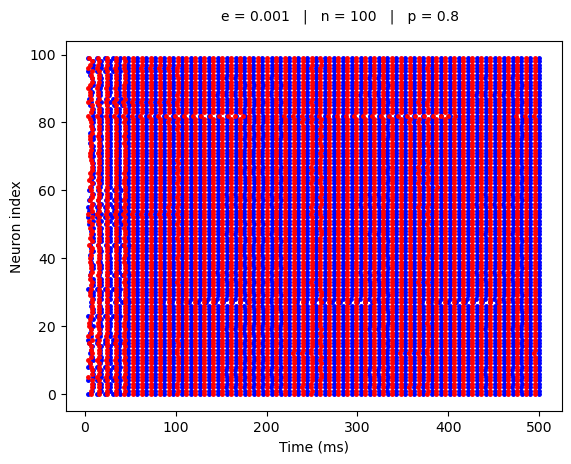

In [108]:
plot(Sp1.t/ms, Sp1.i, '.b', markersize=5)
plot(Sp2.t/ms, Sp2.i, '.r', markersize=5)
xlabel('Time (ms)')
ylabel('Neuron index')
text(150, 110, 'e = {}   |   n = {}   |   p = {}'.format(exc, n, p))
show()

# !neurons of the same indices across the two groups are not necessarily connected to each other!

In [114]:
size(Sp1.t)

5123

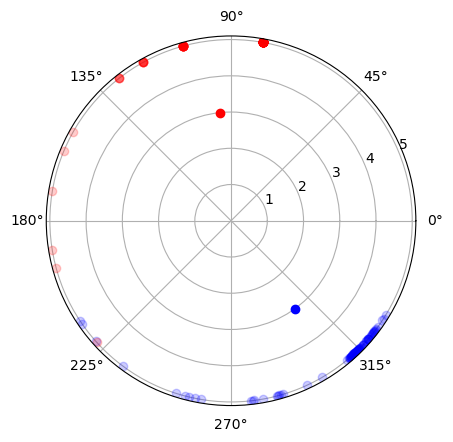

In [115]:
polared = lambda t, M : (M.v[:,t] * 2*pi, mean(M.v[:,t] * 2*pi))
dummy = ones(n)*5
alph = 0.2

timer = 450

pld1 = polared(timer, M1)

pld2 = polared(timer, M2)

M1_avg = pld1[1]
M2_avg = pld2[1]

polar(pld1[0], dummy, 'bo', alpha = alph)
polar(pld2[0], dummy, 'ro', alpha = alph)

polar(M1_avg, 3, 'bo')
polar(M2_avg, 3, 'ro');

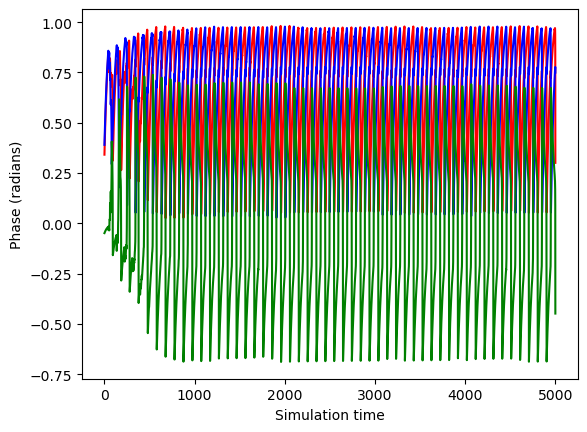

In [116]:
times = range(0, 5000, 1)
M1_avgs = []
M2_avgs = []

for t in times:
        pd1 = polared(t, M1)
        pd2 = polared(t, M2)
        M1_avgs.append(pd1[1]/(2*pi))
        M2_avgs.append(pd2[1]/(2*pi))

plot(times, M1_avgs, color='red')
plot(times, M2_avgs, color='blue')
ylabel("Phase (radians)")
xlabel("Simulation time")
plot(times, subtract(M1_avgs, M2_avgs), color='green');

## Unconnected

In [117]:
start_scope()


inh = 0.001
exc = 0.001
n = 100
tau = 4*ms
cont = 1

eqs3 = '''
dv/dt = ((I/gamma) - v)/tau : 1
'''

seed()

G1 = NeuronGroup(n, eqs3, threshold='v>1', reset='v = 0', method='euler')
G2 = NeuronGroup(n, eqs3, threshold='v>1', reset='v = 0', method='euler')

group1init = randint(0, 9, size=n)/10
group2init = randint(0, 9, size=n)/10

G1.v = group1init
G2.v = group2init

In [118]:
M1 = StateMonitor(G1, 'v', record=True)
M2 = StateMonitor(G2, 'v', record=True)
Sp1 = SpikeMonitor(G1)
Sp2 = SpikeMonitor(G2)

run(500*ms)

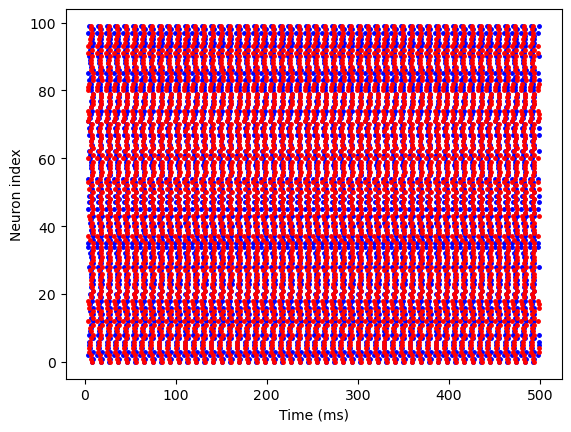

In [119]:
plot(Sp1.t/ms, Sp1.i, '.b', markersize=5)
plot(Sp2.t/ms, Sp2.i, '.r', markersize=5)
xlabel('Time (ms)')
ylabel('Neuron index')
# text(150, 110, 'e = {}   |   n = {}   |   p = {}'.format(exc, n, p))
show()

# !neurons of the same indices across the two groups are not necessarily connected to each other!

In [120]:
polared = lambda t, M : (M.v[:,t] * 2*pi, mean(M.v[:,t]))
dummy = ones(n)*5
alph = 0.2

# timer = 50

# pld1 = polared(timer, M1)

# pld2 = polared(timer, M2)

# M1_avg = pld1[1]
# M2_avg = pld2[1]

# polar(pld1[0], dummy, 'bo', alpha = alph)
# polar(pld2[0], dummy, 'ro', alpha = alph)

# polar(M1_avg, 3, 'bo')
# polar(M2_avg, 3, 'ro');

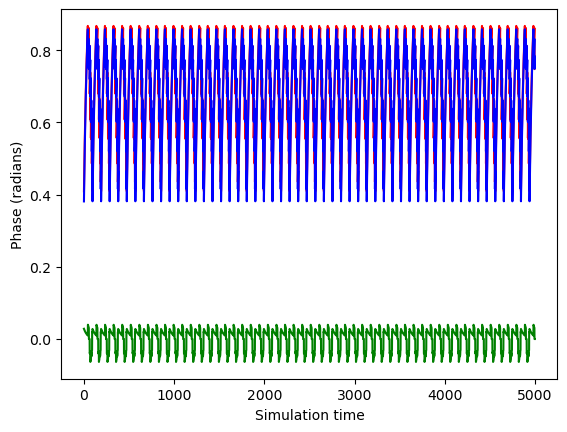

In [121]:
times = range(0, 5000, 1)
M1_avgs = []
M2_avgs = []

for t in times:
        pd1 = polared(t, M1)
        pd2 = polared(t, M2)
        M1_avgs.append(pd1[1]/(1))
        M2_avgs.append(pd2[1]/(1))

plot(times, M1_avgs, color='red')
plot(times, M2_avgs, color='blue')
ylabel("Phase (radians)")
xlabel("Simulation time")
plot(times, subtract(M1_avgs, M2_avgs), color='green');